<span style='color:brown; font-size:32px'>In this notebook, I am going to analyse sales data from Walmart</span>.

***

Currency is in US dollars ($)

***

In [177]:
#importing all the libraries I will need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import plotly.express as px
import scipy.stats as stats

In [237]:
#importing the dataset
df = pd.read_csv('Walmart_Store_Sales.csv')

In [66]:
#checking first five rows of the dataset by calling the df.head()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [67]:
#df.tail() checks the last first rows of the dataset
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [68]:
#We can now determine how big the dataset is
df.shape

(6435, 8)

<span style='font-size:16px'>There are 6435 rows (starting from 0) and 8 columnss.

In [69]:
#Let's take a look at the 8 column names and explain them
df.columns.values

array(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'], dtype=object)

In [70]:
#Store: ID of the store
#Date: Date a transaction took place
#Weekly_Sales: Weekly sales of the store
#Holiday_Flag: Was there a holiday in that weeek or not
#Temperature: Temperature of that day
#Fuel_prices: That is the fuel price in the region (in dollars)
#CPI: That is the current consumer price index (a measure of inflation)
#Unemployment: The unemployment rate

In [230]:
#Let's try to clean the data now that we understand it
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB


In [231]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [232]:
df.duplicated().sum()

0

<span style='font-size:16px'>There are no duplicates and no null values which means the data is clean. We can go ahead and uncover some information. <br>Data science is all about answering questions. By the end of my analysis, I am hoping to find at least:</br></span>

---> the impact on sales due to temperature, and economic conditions, 
<br> ---> the stores that recorded the highest quarter and anual sales growth,</br>
---> and the best and worst month and quarter for the stores.


<span style='color:brown; font-size:32px'>Applying Desccriptive Statistics</span>

In [74]:
# Mean for the columns
columns = ['Store', 'Weekly_Sales','Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
mean = df[columns].mean()
rounded_mean = round(mean, 1)
print(rounded_mean)

Store                23.0
Weekly_Sales    1046964.9
Holiday_Flag          0.1
Temperature          60.7
Fuel_Price            3.4
CPI                 171.6
Unemployment          8.0
dtype: float64


<span style='font-size:16px'>So, Walmart can expect store ID 23 to make weekly sales worth 1,046,956.00 at an average temperature of 61°F, when the unemployment rate is 8%, CPI is 172, Fuel price is 3 per litre, and there are no holidays during the week</span>.

In [162]:
#finding the median
median = df[columns].median()
rounded_median = round(median, 1)
print(rounded_median)

Store               23.0
Weekly_Sales    960746.0
Holiday_Flag         0.0
Temperature         62.7
Fuel_Price           3.4
CPI                182.6
Unemployment         7.9
dtype: float64


<span style='font-size:16px'>The median weekly sales of store 23 is $960,746.00</span>

In [135]:
#finding the mode for weekly sales
weekly_sales = 'Weekly_Sales'
values = df[weekly_sales]
mode = st.mode(values)
print(mode)

1643690.9


<span style='font-size:16px'>The modal sales per week of store 23 is $1,643,691 which is slightly higher than the mean. 
The distribution could be positively skewed. We will see later.</span>

In [228]:
# Finding Quartiles for weekly sales 

percentiles = np.percentile(df['Weekly_Sales'], [25, 50, 75])
print('25th Percentile:', percentiles[0])
print('50th Percentile (Median):', percentiles[1])
print('75th Percentile:', percentiles[2])

25th Percentile: 553350.105
50th Percentile (Median): 960746.04
75th Percentile: 1420158.66


<span style='font-size:16px'>At least 25% of weekly sales is 553,350.11, 50% is 960746.04 and 75% go as high as 1,420,158.66</span>

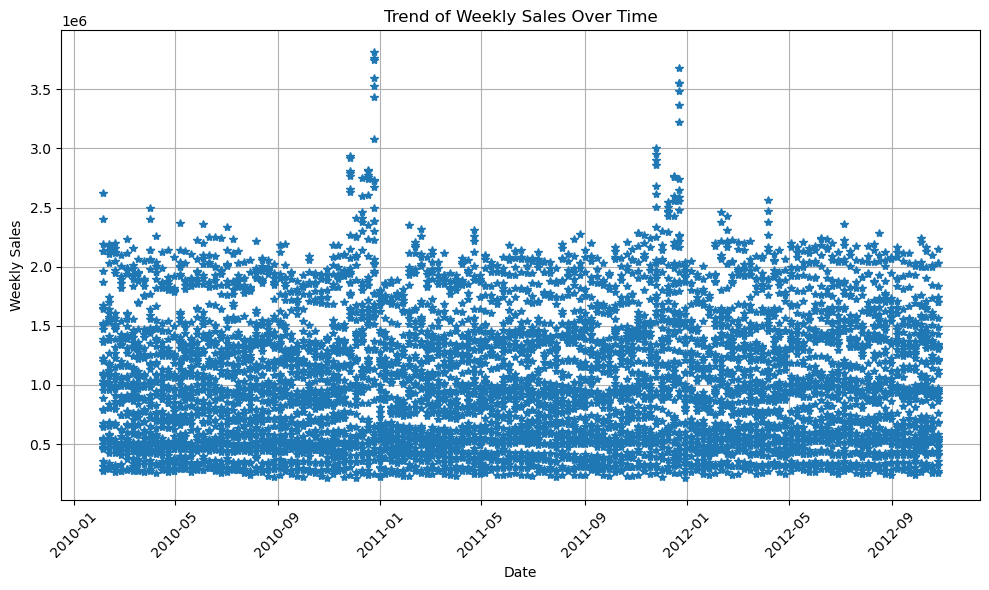

In [229]:
# Weekly sales over time 

# Converting Date column to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sorting DataFrame by Date
df.sort_values(by='Date', inplace=True)

# Plotting trend of Weekly Sales over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Weekly_Sales'], marker='*', linestyle='')
plt.title('Trend of Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<span style='font-size:16px'>We have sales data from 2010 to 2012. 
<br>While the seasonal trend is consistent, the magnitudes of the peaks vary across different years.</br></span>

In [233]:
#Measures of variability (dispersion) 

#Minimum values 
min = df[columns].min()
rounded_min = round(min)
print(rounded_min)

Store                1.0
Weekly_Sales    209986.0
Holiday_Flag         0.0
Temperature         -2.0
Fuel_Price           2.0
CPI                126.0
Unemployment         4.0
dtype: float64


In [160]:
#Maximum values
max = df[columns].max()
rounded_max = round(max)
print(rounded_max)

Store                45.0
Weekly_Sales    3818686.0
Holiday_Flag          1.0
Temperature         100.0
Fuel_Price            4.0
CPI                 227.0
Unemployment         14.0
dtype: float64


In [166]:
#Finding the range for weekly sales
weekly_sales = df['Weekly_Sales']
range = weekly_sales.max() - weekly_sales.min()
print("The weekly sales range is:", range)

The weekly sales range is: 3608700.2


In [235]:
#The minimum and the maximum values are too far apart and stretch the range. 
#It will make much more sense to get the interquartile range. 

first_quartile = 553350
#i.e the 25th percentile

third_quartile = 1420159
#i.e the 75th Percentile

interquartile_range = third_quartile - first_quartile
print('Interquartile range:', interquartile_range)

Interquartile range: 866809


<span style='font-size:16px'>This measures the middle 50% of weekly sales and reduces sensitivity of extreme data values.</span>

In [172]:
# looking at the variance (weekly sales)
variance = np.var(df['Weekly_Sales'])
print(variance)


318460187633.8971


<span style='font-size:16px'>This is the average of the squared differences between each data value and the mean. <br>The standard deviation will give us a more clearer view how data points are spread from the mean.</br></span>

In [213]:
# Standard deviation
std_dev = np.std(df['Weekly_Sales'])
rounded_std_dev = round(std_dev)
print(rounded_std_dev)

564323


In [175]:
# coefficient of variation (std_dev/mean*100)
C_o_V = 564323 / 1046964.9 * 100
print(C_o_V)

53.90085188147186


<span style='font-size:16px'>The standard deviation is about 54% of the mean.</span>

In [178]:
# Distribution shape
skewness = stats.skew(df['Weekly_Sales'])
print(skewness)

0.6682059921068095


<span style='font-size:16px'>Skewness is 1.0 (skewed right-positive). The mean (1,046,965.00) is more than the median (960,746.00).</span>

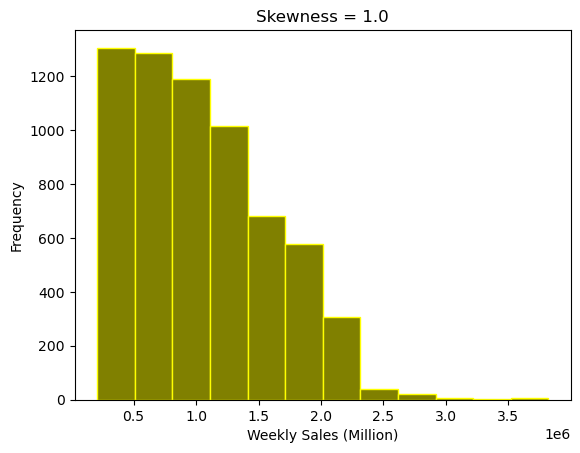

Kurtosis: 0.05216738979784408


In [304]:
# plotting the skewness using matplotlib library

plt.hist(df['Weekly_Sales'], bins=12, color='olive', edgecolor='yellow')
plt.xlabel('Weekly Sales (Million)')
plt.ylabel('Frequency')
plt.title('Skewness = 1.0')
plt.show()

# Calculating kurtosis
from scipy.stats import kurtosis

kurtosis = kurtosis(df['Weekly_Sales'])
print('Kurtosis:', kurtosis)

<span style='font-size:16px'>Majority of the dataset is concentrated on the left. The kurtosis indicate a relatively moderate peak(not too sharp) indicating a few outliers (high values) on the right.</span>

In [224]:
# Detecting outliers with zscores (x - mean / std)

# zscore of minimun data point (209986)
z_score = [(209986 - 1046965) / 564323]
print('zScore for the smallest value is:',z_score)

# zscore of maximum data point (3818686)
z_score = [(3818686 - 1046965) / 564323]
print('zScore for the largest value is:',z_score)

zScore for the smallest value is: [-1.4831559231149536]
zScore for the largest value is: [4.911586095197254]


<span style='font-size:16px'>The smallest value is not an outlier, the largest value is, which is 5 standard deviations above the mean.</span>

***

In [219]:
# Analysing the spread of weekly sales with Chebyshev's theorem
# 1-1/z ** 2
# let 
z = 2
mean = 104696
std_dev = 564323
lower_bound = mean - z * std_dev
upper_bound = mean + z * std_dev

# Counting the number of data points within the bounds
within_bounds = [x for x in df['Weekly_Sales'] if lower_bound <= x <= upper_bound]

# Calculating the proportion of data within the bounds
proportion_within_bounds = len(within_bounds) / len(df['Weekly_Sales'])

print(lower_bound)
print(upper_bound)
print(f"At least {proportion_within_bounds:.1%} of the data lies within {z} standard deviations of the mean.")

-1023950
1233342
At least 64.5% of the data lies within 2 standard deviations of the mean.


In [222]:
#when 
z = 4
lower_bound = mean - z * std_dev
upper_bound = mean + z * std_dev
within_bounds = [x for x in df['Weekly_Sales'] if lower_bound <= x <= upper_bound]
proportion_within_bounds = len(within_bounds) / len(df['Weekly_Sales'])
print(f"{proportion_within_bounds:.0%} of the data lie within {z} standard deviations of the mean.")

99% of the data lie within 4 standard deviations of the mean.


<span style='font-size:16px'>The distribution of weekly sales across the stores is not symmetric as we saw with the skewness (positive).
<br>Therefore, the Empirical Rule will not apply.</br></span>

<span style='color:brown; font-size:32px'>Five-Number summary</span>

In [239]:
Smallest_Value = 209986
First_Quartile = 553350
Median = 960746
Third_Quartile = 1420159
Largest_Value = 3818686

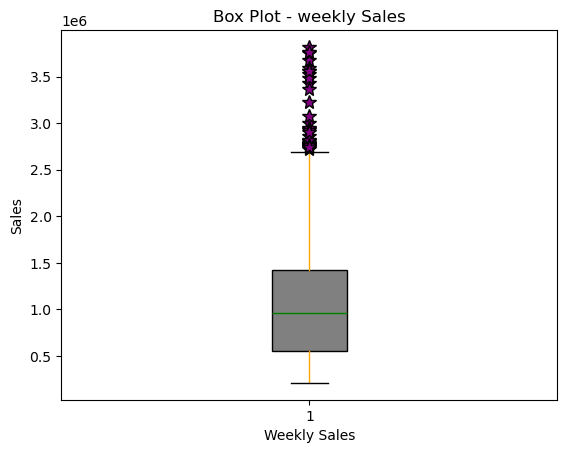

In [261]:
#Boxplot for weekly sales

plt.boxplot(df['Weekly_Sales'], 
            patch_artist=True, 
            boxprops=dict(facecolor="grey"),
            whiskerprops=dict(color="orange"),  # Color of the whiskers
            medianprops=dict(color="green"),  # Color of the median line
            flierprops=dict(markerfacecolor="purple", marker="*", markersize=10)  # Outliers
            )
plt.ylabel('Sales')
plt.xlabel('Weekly Sales')
plt.title('Box Plot - weekly Sales')
plt.show()

<span style='font-size:16px'>The boxplot above visualize the distribution of weekly sales indicating the first, median/second
(green line), and third quartiles. <br> The whiskers are 1.5times the interquartile range. Above the whiskers are the outliers. </span>

<span style='color:brown; font-size:32px'> Measure of Association </span>

covariance is: 5310.126928380916
coefficient is: 0.03689096801041455


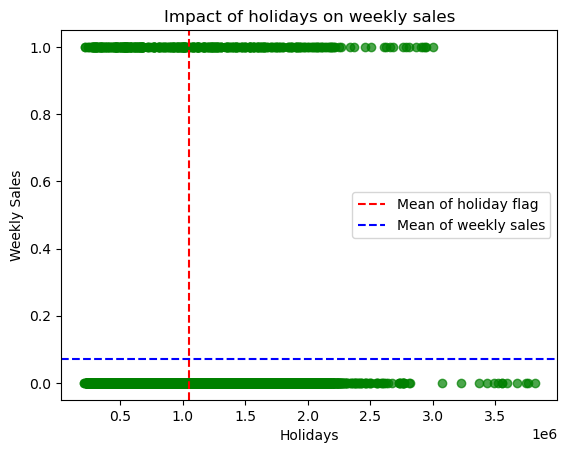

In [294]:
#Covariance between weekly sales and holidays
#shows linear association
x = df['Weekly_Sales']
y = df['Holiday_Flag']

covariance = np.cov(x,y)[0][1]
print('covariance is:',covariance)

#correlation coefficient
coefficient = np.corrcoef(x, y)[0, 1]
print('coefficient is:',coefficient)

#Plotting the relationship
plt.scatter(x, y, color='green', alpha=0.7)
plt.xlabel('Holidays')
plt.ylabel('Weekly Sales')
plt.title('Impact of holidays on weekly sales')
plt.axvline(np.mean(x), color='red', linestyle='--', label='Mean of holiday flag')
plt.axhline(np.mean(y), color='blue', linestyle='--', label='Mean of weekly sales')
plt.legend()
plt.show()

<span style='font-size:16px'>Their relationship is positive but not strong. Weekly sales slightly increase when there are holidays in the week.</span>

-664243.3788590229
-0.06381001317946956


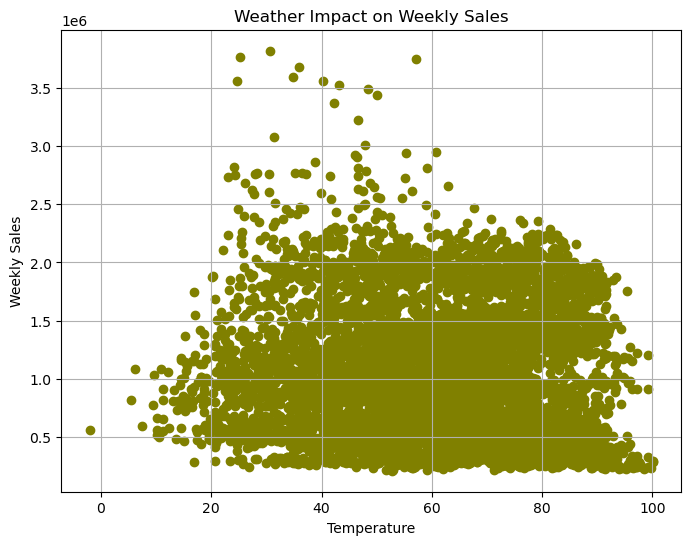

In [295]:
# Relationship between weather and sales
x = df['Weekly_Sales']
y = df['Temperature']

covariance = np.cov(x,y)[0][1]
print(covariance)
     
coefficient = np.corrcoef(x, y)[0, 1]
print(coefficient)

# Plotting Weather Impact on Weekly Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='olive')
plt.title('Weather Impact on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

<span style='font-size:16px'>Moderate temperatures are associated with high sales volumes with some outliers in the data points pointing out that other factors other than temperature may influence sales.</span>

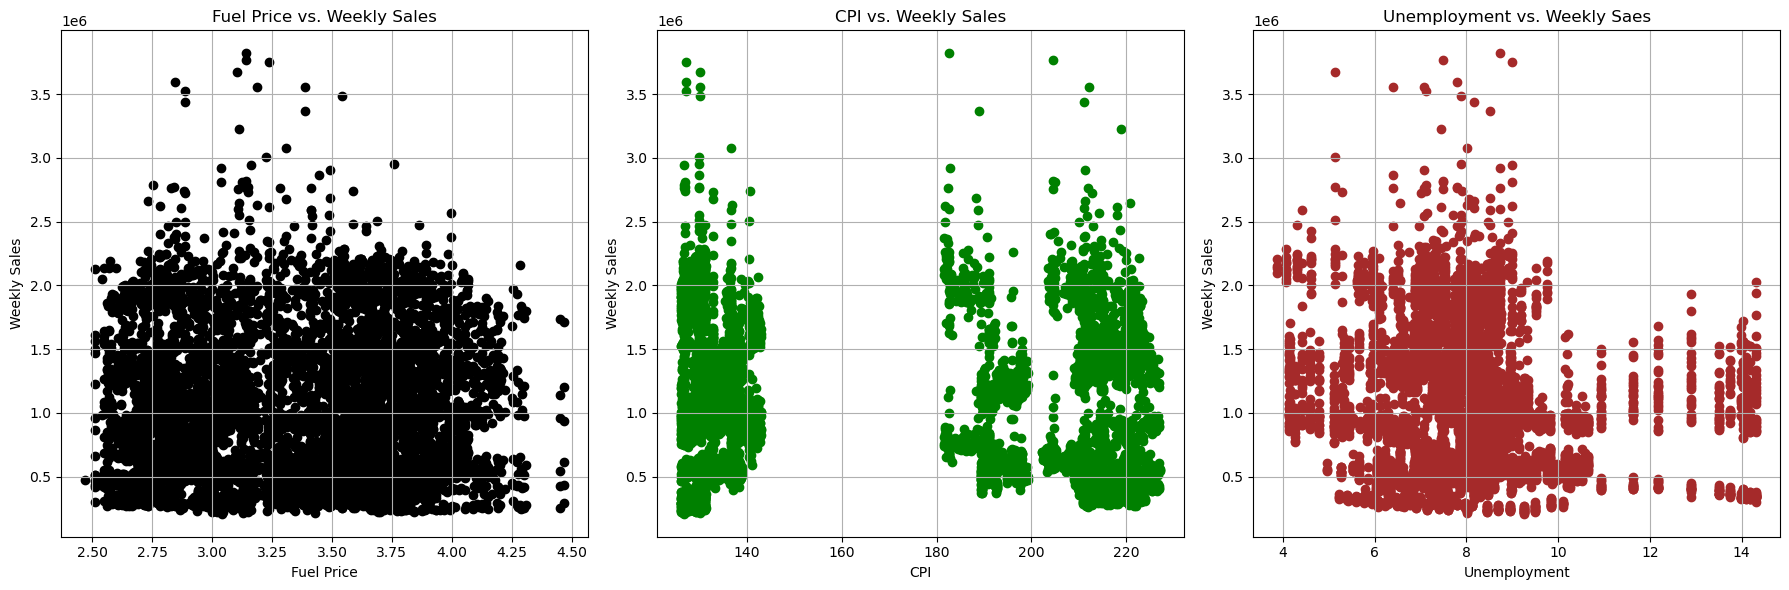

In [297]:
# Plotting Economic Factors Impact on Weekly Sales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Fuel Price vs. Weekly Sales
axes[0].scatter(df['Fuel_Price'], df['Weekly_Sales'], color='black')
axes[0].set_title('Fuel Price vs. Weekly Sales')
axes[0].set_xlabel('Fuel Price')
axes[0].set_ylabel('Weekly Sales')
axes[0].grid(True)

# Scatter plot for CPI vs. Weekly Sales
axes[1].scatter(df['CPI'], df['Weekly_Sales'], color='green')
axes[1].set_title('CPI vs. Weekly Sales')
axes[1].set_xlabel('CPI')
axes[1].set_ylabel('Weekly Sales')
axes[1].grid(True)

# Scatter plot for Unemployment vs. Weekly Sales
axes[2].scatter(df['Unemployment'], df['Weekly_Sales'], color='brown')
axes[2].set_title('Unemployment vs. Weekly Saes')
axes[2].set_xlabel('Unemployment')
axes[2].set_ylabel('Weekly Sales')
axes[2].grid(True)
plt.tight_layout()

plt.show()

<span style='color:brown; font-size:16px'>Here are some potential insights</span>

Fuel Price vs. Weekly Sales: The scatter plot displays a generally negative correlation between fuel prices and weekly sales. As fuel prices increase, weekly sales tend to decrease, with the highest concentration of data points occurring at lower fuel prices and higher sales. This suggests that higher fuel costs could negatively impact consumer spending and business sales.

CPI vs. Weekly Sales: The relationship between CPI (a measure of inflation) and weekly sales appears to be relatively weak or inconclusive based on the scattered data points. While there is a slight negative trend, the data points are widely dispersed, indicating that CPI alone may not be a strong predictor of sales performance.

Unemployment vs. Weekly Sales: The scatter plot shows a clear negative correlation between unemployment rate and weekly sales. As unemployment increases, weekly sales tend to decrease. The data points are more tightly clustered, suggesting a stronger inverse relationship between these two variables. Higher unemployment likely leads to reduced consumer spending and lower business sales.

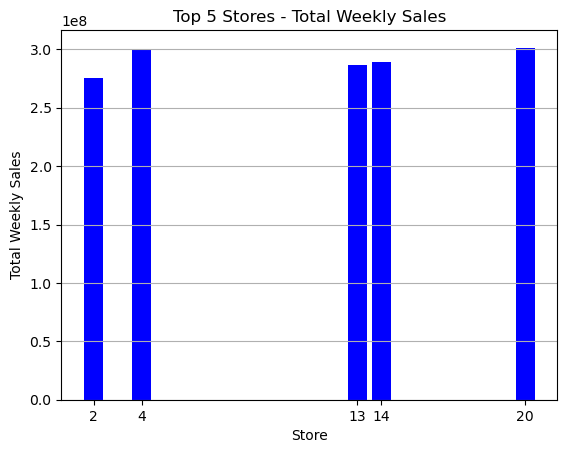

In [83]:
# total Weekly Sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum()

# Selects top 5 stores based on total sales
top_5_stores = store_sales.nlargest(5)

# Plotting Store Comparison for top 5 stores
plt.bar(top_5_stores.index, top_5_stores.values, color='blue')
plt.title('Top 5 Stores - Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(top_5_stores.index)
plt.grid(axis='y')
plt.show()

<span style='font-size:16px'>Store 4 and Store 20 have the highest total weekly sales.

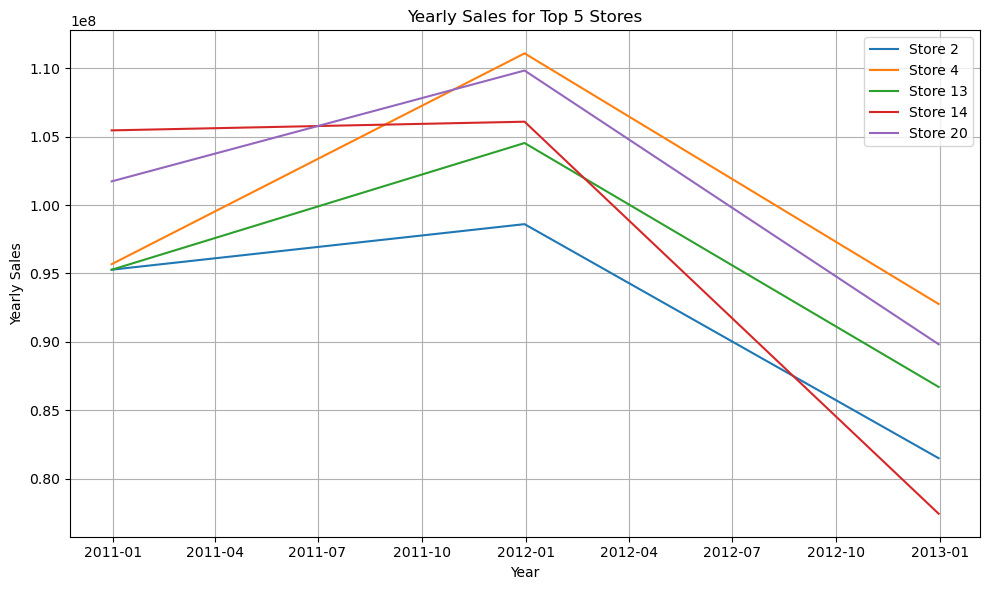

In [84]:
# Group by Store and Date, then sum the Weekly Sales for each Store and Date
df_agg = df.groupby(['Store', pd.Grouper(key='Date', freq='Y')])['Weekly_Sales'].sum().reset_index()

# Sort by Total Yearly Sales and select top 5 stores
top_5_stores = df_agg.groupby('Store')['Weekly_Sales'].sum().nlargest(5).index

# Filter the dataframe to include only data for top 5 stores
df_top_5 = df_agg[df_agg['Store'].isin(top_5_stores)]

# Plotting the Yearly Sales for top 5 stores
plt.figure(figsize=(10, 6))
for store, data in df_top_5.groupby('Store'):
     plt.plot(data['Date'], data['Weekly_Sales'], label=f'Store {store}')

plt.title('Yearly Sales for Top 5 Stores')
plt.xlabel('Year')
plt.ylabel('Yearly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Store 4 consistently had the highest yearly sales throughout the period shown, indicating its strong and stable performance as the top-selling store.

Store 20 had the second-highest yearly sales, closely following Store 14's performance pattern.

Stores 13, 14, and 2 exhibited a similar trend, with their yearly sales peaking around mid-2012 and then declining towards the end of the period.

All five stores experienced a dip in yearly sales around the beginning of 2012, suggesting a potential industry-wide or external factor that impacted sales during that time.



<span style='font-size:20px'>Conclusion:

In this analyis, I utilized jupyter notebook to explore and extract insights from a walmart dataset that I obtained from Kaggle. I conducted various data manipulations, visualization, and statistical analysis tasks by leveraging Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn. 

Work Cited <br>
Dixit, A. (2024, March 28). Retrieved March 2024, from Kaggle: https://www.kaggle.com/code/anushadixit1901/walmart-sales-analysi.s




***



***


<span style='color:brown; font-size:32px'>Reflections:</span>

Many insights can be uncovered from raw data. I had not really understood that until now. These two assignments have given me a foundational introduction to data science. From data cleaning and visualization to statistical analysis, each task provided invaluable hands-on experience. In excel, I learned data manipulation, gaining insights into spreadsheet analysis. I must say excel was a little bit of a hustle figuring out visualization tools which I ended up using Pivot tables making me earn low marks. Transitioning to Jupyter Notebook, I delve deeper into Python programming, exploring its powerful libraries like Pandas, Numpy, Matplotlib and Seaborn. Excel provided the foundation, while Jupyter Notebooks empowered me with advanced tools for interactive data analysis. 

<span style='color:brown'>What was different between Python and Excel:</span><br>
My first dataset was large and must scroll through pages to get to a desired data point. Also, it was slow to load. The built-in functions also did not play nice with customization because I had to combine functions to get what I want which was just complex. Python was fast and required simple lines of codes to perform complex calculations in seconds. Limitations I faced with Python was that some of the codes I did not understand, I had to do some research before using. For example, asking chatGPT for clarifications. 

<span style='color:brown'>When will you use either of them?</span><br>
Excel is user-friendly, and I can collaborate with others to work on simple calculation and create charts. I will use it when I don’t want to code. I will choose python when I have a large data set to work on due to its efficiency and automation capabilities. The libraries gives you just what you need.

<span style='color:brown'>What would you do differently?</span><br>
With the excel assignment, I will use a simple to medium dataset that does not span multiple rows and columns. Pivot tables make excel data analysis easier, but I will avoid it and explore the built-in functions to understand the tools properly. In Python, I will try to use less code. 

<span style='color:brown'>The gaps in my programming and stats knowledge:</span><br>
Python comes with a lot of libraries and modules. My coding skills is foundational and I am working on improving. I also need to do a little more work on correlations and how to interpret the answers I come up with.  



<span style='color:brown; font-size:32px'>GitHub Link:</span>